In [22]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import os
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [23]:
data_files = glob.glob("Tell1CalibCsv/*.csv")

In [24]:
def module_names():
    names = []
    data = pd.read_csv(data_files[0] ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("pedestal")]
    names = data[1]
    return names

print(type(module_names()))

<class 'pandas.core.series.Series'>


In [25]:
def join_pedestal_data():
    joined_data = pd.DataFrame()
    for file in data_files:
        data = pd.read_csv(file ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
        data = data[data[0].str.contains("pedestal")]
        joined_data = pd.concat([joined_data, data.loc[:, 2:2049]], axis=1)
        #joined_data = joined_data.append(data.loc[:, 2:2049], ignore_index=True)
    
    joined_data.index = module_names()
    joined_data.columns = range(90112)
    return joined_data

joined_pedestal_data_by_module = join_pedestal_data()
print(joined_pedestal_data_by_module)

                   0      1      2      3      4      5      6      7      \
1                                                                           
VeloTELL1Board0      515    516    514    514    516    515    515    516   
VeloTELL1Board1      508    510    510    509    510    511    511    512   
VeloTELL1Board10     517    520    519    518    521    521    519    522   
VeloTELL1Board100    514    514    517    519    518    517    519    517   
VeloTELL1Board101    521    522    521    523    523    521    521    521   
VeloTELL1Board102    509    510    512    511    509    511    510    509   
VeloTELL1Board103    510    509    510    512    511    514    513    514   
VeloTELL1Board104    518    517    517    516    514    516    514    517   
VeloTELL1Board105    515    522    517    520    517    517    519    518   
VeloTELL1Board11     527    528    527    529    527    530    529    529   
VeloTELL1Board12     525    526    528    526    528    527    525    528   

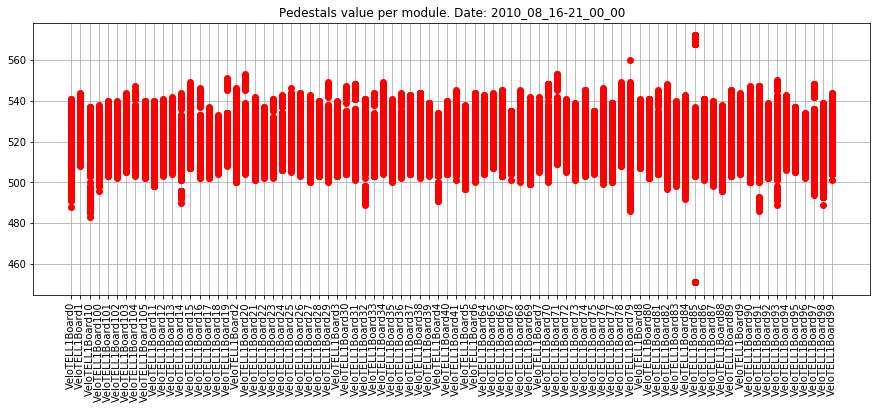

In [26]:
data2 = pd.DataFrame()
data = pd.read_csv(data_files[0] ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
data = data[data[0].str.contains("pedestal")]
data2 = data.loc[:, 2:2049]

data2.index = module_names()
data2.columns = range(2048)

fig, ax = plt.subplots()
ax.set_title('Pedestals value per module. Date: 2010_08_16-21_00_00')
    
for i in range(len(data2.columns)):
    ax.plot(data2.index, data2[i], 'ro')
    
plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()

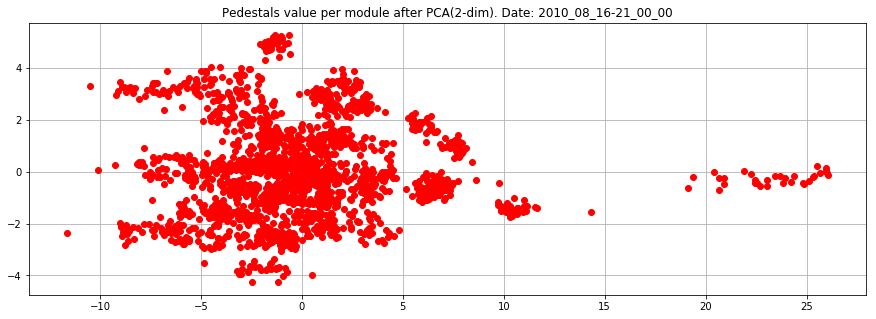

In [27]:
data_PCA = data2.T

x = data_PCA.loc[:, module_names()].values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
#print(principalDf)

fig, ax = plt.subplots()
ax.set_title('Pedestals value per module after PCA(2-dim). Date: 2010_08_16-21_00_00')
    
ax.plot(principalDf['principal component 1'], principalDf['principal component 2'], 'ro')
    
#plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()

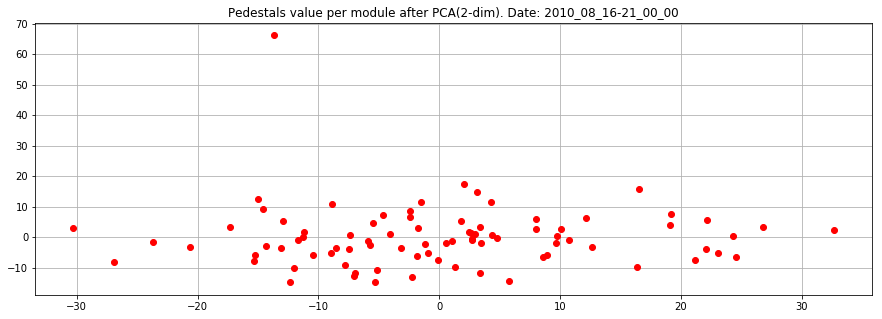

In [28]:
data_PCA = data2

x = data_PCA.loc[:, range(2048)].values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
#print(principalDf)

fig, ax = plt.subplots()
ax.set_title('Pedestals value per module after PCA(2-dim). Date: 2010_08_16-21_00_00')
    
ax.plot(principalDf['principal component 1'], principalDf['principal component 2'], 'ro')
    
#plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()

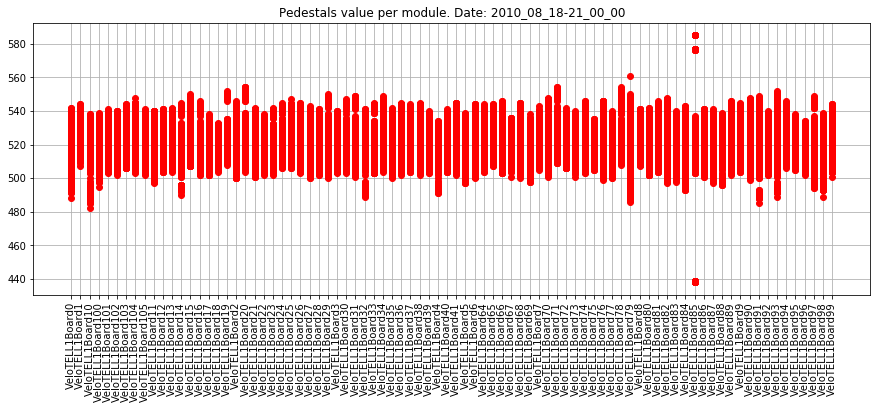

In [29]:
data2 = pd.DataFrame()
data = pd.read_csv(data_files[1] ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
data = data[data[0].str.contains("pedestal")]
data2 = data.loc[:, 2:2049]

data2.index = module_names()
data2.columns = range(2048)

fig, ax = plt.subplots()
ax.set_title('Pedestals value per module. Date: 2010_08_18-21_00_00')
    
for i in range(len(data2.columns)):
    ax.plot(data2.index, data2[i], 'ro')
    
plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()

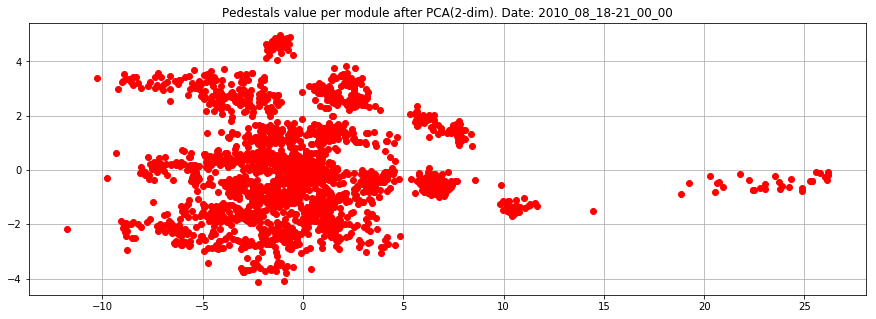

In [37]:
data_PCA = data2.T

x = data_PCA.loc[:, module_names()].values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
#print(principalDf)

fig, ax = plt.subplots()
ax.set_title('Pedestals value per module after PCA(2-dim). Date: 2010_08_18-21_00_00')
    
ax.plot(principalDf['principal component 1'], principalDf['principal component 2'], 'ro')
    
#plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()

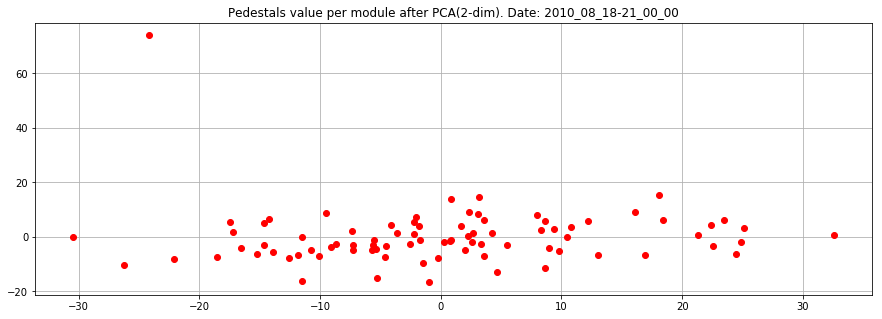

In [36]:
data_PCA = data2

x = data_PCA.loc[:, range(2048)].values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
#print(principalDf)

fig, ax = plt.subplots()
ax.set_title('Pedestals value per module after PCA(2-dim). Date: 2010_08_18-21_00_00')
    
ax.plot(principalDf['principal component 1'], principalDf['principal component 2'], 'ro')
    
#plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()

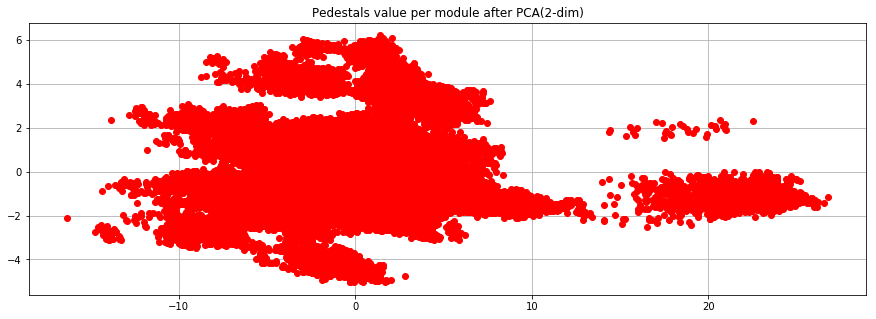

In [34]:
data_PCA = joined_pedestal_data_by_module.T

x = data_PCA.loc[:, module_names()].values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
#print(principalDf)

fig, ax = plt.subplots()
ax.set_title('Pedestals value per module after PCA(2-dim)')
    
ax.plot(principalDf['principal component 1'], principalDf['principal component 2'], 'ro')
    
#plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()

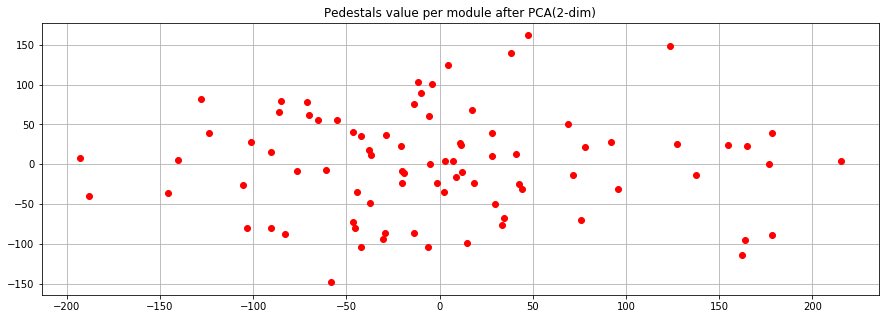

In [35]:
data_PCA = joined_pedestal_data_by_module

x = data_PCA.loc[:, range(90112)].values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
#print(principalDf)

fig, ax = plt.subplots()
ax.set_title('Pedestals value per module after PCA(2-dim)')
    
ax.plot(principalDf['principal component 1'], principalDf['principal component 2'], 'ro')
    
#plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()